## 範例
如何使用現有的 github 資源運行及學習 yolov3

In [1]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.0


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive'
!git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
fatal: destination path 'keras-yolo3' already exists and is not an empty directory.
/content/gdrive/My Drive/keras-yolo3


In [3]:
import os
import subprocess
if not os.path.exists("model_data/yolo.h5"):
  # 下載 yolov3 的網路權重，並且把權重轉換為 keras 能夠讀取的格式
  print("Model doesn't exist, downloading...")
  os.system("wget https://pjreddie.com/media/files/yolov3.weights")
  print("Converting yolov3.weights to yolo.h5...")
  os.system("python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5")
else:
  print("Model exist")

Model exist


In [4]:
# 下載圖片範例，如果已經下載過就可以註解掉
!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
!wget https://github.com/pjreddie/darknet/blob/master/data/horses.jpg?raw=true -O horses.jpg

--2019-12-01 14:29:48--  https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/data/dog.jpg [following]
--2019-12-01 14:29:48--  https://github.com/pjreddie/darknet/raw/master/data/dog.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg [following]
--2019-12-01 14:29:48--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163759 

In [5]:
from yolo import YOLO # 從 yolo.py 中將該項目定義的 YOLO class 載入，其詳細定義請參考 yolo.py
from PIL import Image

Using TensorFlow backend.


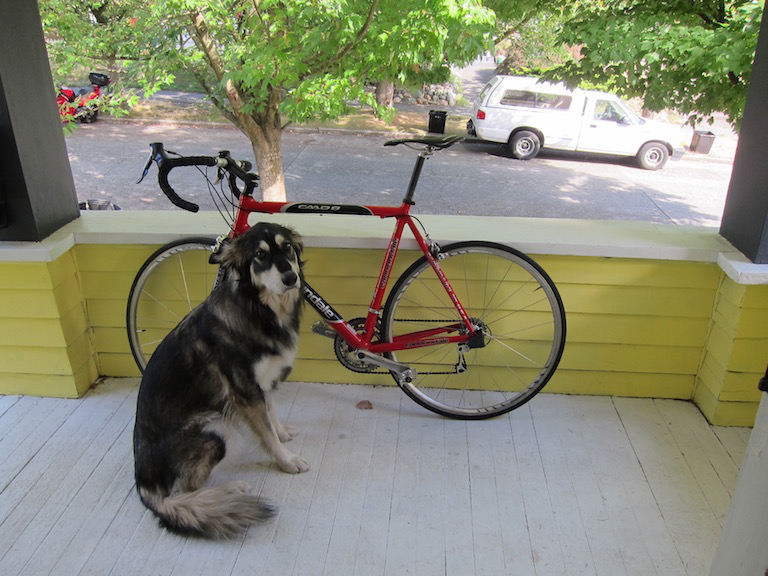

In [6]:
image = Image.open('dog.jpg') # 讀取範例圖片
image

In [7]:
yolo = YOLO() # 初始化 YOLO class













model_data/yolo.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
r_image = yolo.detect_image(image) # 執行 yolo 檢測，將回傳的圖片儲存在 r_image 中

(416, 416, 3)
Found 3 boxes for img
dog 0.99 (128, 224) (314, 537)
truck 0.91 (475, 85) (689, 170)
bicycle 0.99 (162, 119) (565, 441)
4.849179568998807


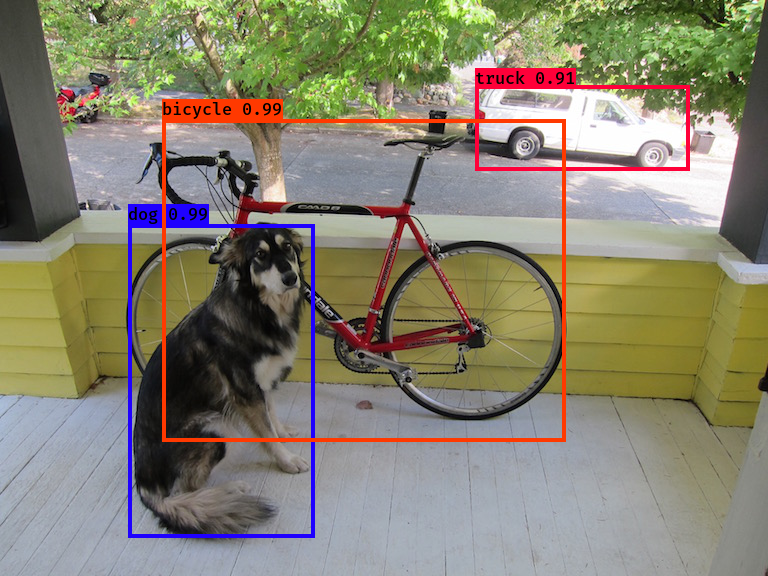

In [9]:
r_image # 顯示 r_image，可觀察到圖片上已畫上 yolov3 所檢測的 object

## 作業
該版本的 yolov3 實現邏輯主要寫在 `yolo.py` 中 `YOLO` 這個 class 的 `detect_image` ，其回傳已畫上檢測到的 bboxes 和物件類別的圖片。

1. 請嘗試閱讀及盡量理解 `detect_image` 的程式碼片段
2. 請修改/模仿 `detect_image` 的寫法，使其回傳 bboxes 的信息、信心度及 bboxes 對應的類別
